Perceptron Implementation in Python

In [39]:
import numpy as np

Next, we'll create the perceptron class and declare certain parameters such as learning rate, epochs and random state.

In [40]:
class Perceptron(object):
    def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state

Fit is used t map the training data inputs(X) with training labels or targets(y). Fit will call the other two functions internally. All the necessary calculations take place here. Two matrices are maintained, one for weight updates and the other for error updates. Weights are randomly selected and as the algorithm learns, it is updated with new values. Errors are maintained to keep track of any misclassifications.

Note that the weights array should and must have the same dimensions as the input array. Otherwise, dot product will not be possible. To calculate error, the difference between the actual and predicted value is taken, multiplied by the learning rate and the result is added back to the weights array.

In [41]:
class Perceptron(object):
    def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.weights = rand.normal(loc = 0.0, scale=0.01, size = 1 + X.shape[1])
        self.errors_ = []
        for _ in range (self.n_iter):
            errors = 0
        for x, target in zip(X, y):
            update = self.learning_rate * (target - self.predict(x))
            self.weights[1:] += update*x
            self.weights[0] += update
            errors +=int(update !=0.0)
            self.errors_.append(errors)
            return self
    def net_input(self, X):
        z = np.dot(X, self.weights[1:])+ self.weights[0]
        return z

    #prediction is made based upon the summation result
    def predict(self,X):
        return np.where(self.net_input(X) >= 0,1,-1)


Bias is taken as the first value of the weights array, w0. During each iteration, summation of bias with the dot product of weight and input X at that instance is taken.

In [44]:
#Loading the dataset
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y = True)

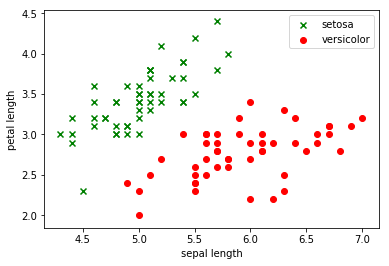

In [45]:
#Let us visualize the data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.scatter(X[:50, 0], X[:50,1], color = 'green', marker='x', label ='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'red', marker = 'o', label = 'versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 'upper right')
plt.show()

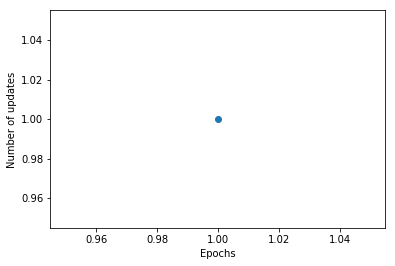

In [46]:
#call our initially created perceptron class 
per = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
per.fit(X,y)
plt.plot(range(1, len(per.errors_) +1), per.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()